# Imports

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score

# Let's try to fit a quadratic function with a Linear Regression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%209%20-%20Deep%20Learning/data/noisy_quadratic.csv')
data

,x,y
0,-5.00000,25.811015
1,-4.89899,24.846666
2,-4.79798,22.192836
3,-4.69697,22.659922
4,-4.59596,22.284277
...,...,...
95,4.59596,20.522109
96,4.69697,23.007546
97,4.79798,21.930013
98,4.89899,24.357631


This dataset is for demonstration purposes on what basis regression is. Normally you won't have 1 feature only so you won't be able to visualize easily the relationship between the features and the target of a dataset. Nor will that relationship be as simple as a quadratic one.

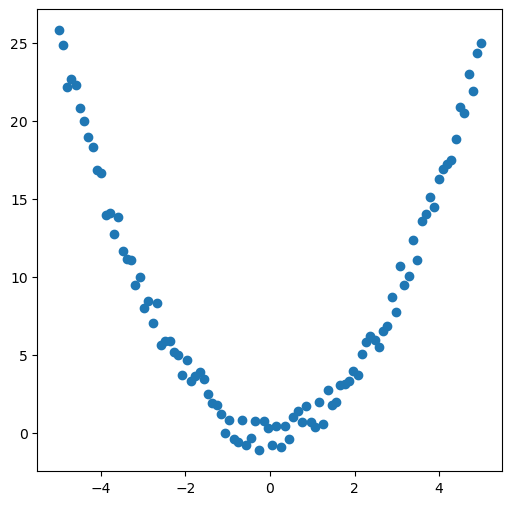

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(data['x'],data['y'])

## Let's fit a Linear Regression

In [4]:
x = data['x'].values.reshape(-1,1) # sklearn expects 2D array even if you only have one feature. n rows, 1 column
y = data['y']

In [5]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

## How well did our model fit the training data?

In [6]:
preds = model.predict(x)

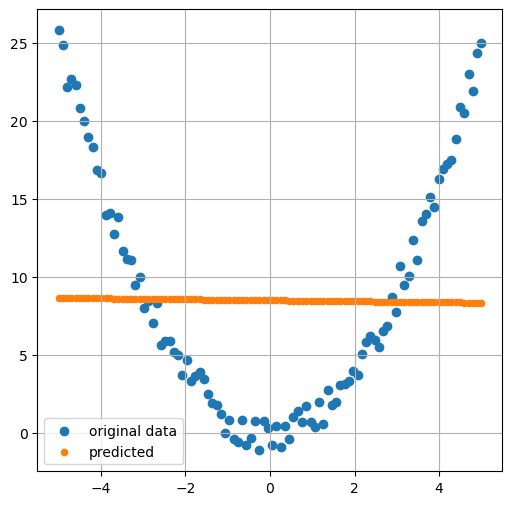

In [7]:
plt.figure(figsize=(6,6));
plt.scatter(x,y,label='original data');
# plot for the preds but reduze the size of the dots on the scatter
plt.scatter(x,preds,label='predicted',s=20);
plt.grid()
plt.legend();

In [8]:
mse = lambda y_true, y_pred: np.mean((y_true - y_pred)**2)

mse(y, preds)

59.5639959131339

This is the best Mean Squared Error we can get on this data with a Linear Regression

## Change of basis

This is where magic happens.

$y|x$ seems suspiciously like a quadratic relationship

In [9]:
new_x = x**2 # change of basis

What's the relationship between `new_x` and `y` now?

markdown for suspense 

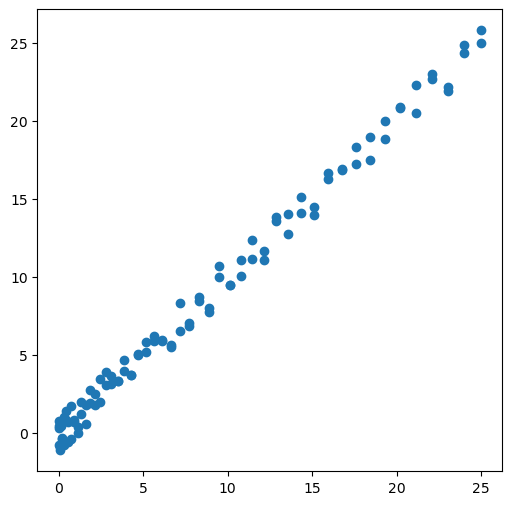

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(new_x,data['y'])

![](media/pika.JPG)

## Fitting a model on the new representation of x

Well, fitting a linear regression on the original data didn't work out so well so let's fit here on the new **representation** of x instead!

In [11]:
new_model = LinearRegression()
new_model.fit(new_x,y)

LinearRegression()

How well did we fit this data?

In [12]:
new_preds = new_model.predict(new_x)
mse(y, new_preds)

0.48657928274586815

MSE was in the 50s before, now it's 0.45

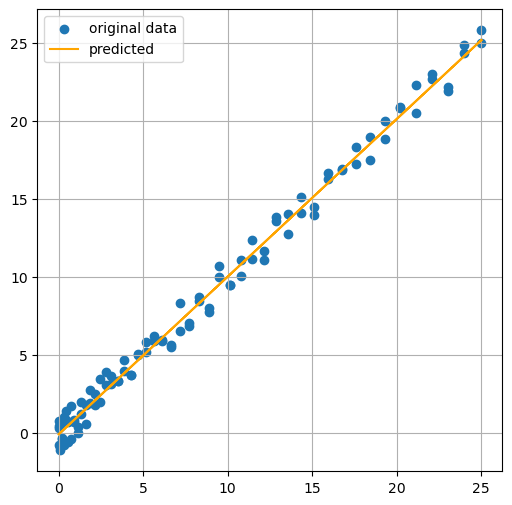

In [13]:
plt.figure(figsize=(6,6));
plt.scatter(new_x,y,label='original data');
# plot for the preds but reduze the size of the dots on the scatter
plt.plot(new_x,new_preds,label='predicted', color='orange');
plt.grid()
plt.legend();

![](media/why.JPG)

Well essentially now you know that when you get more data, just square x and have the model predict with that value, because then you know it will predict well!

Now let me show you something cool. let's plot the predictions on the original basis

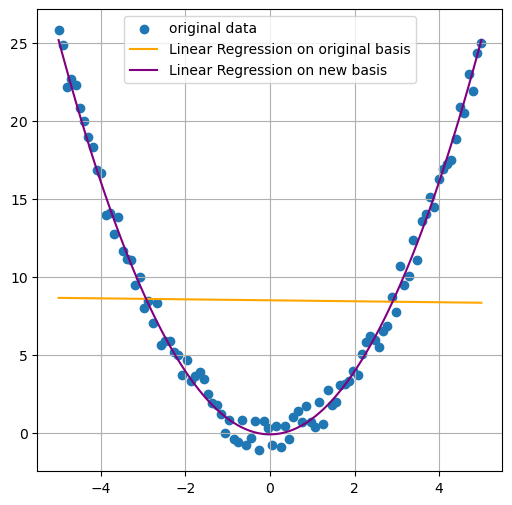

In [14]:
plt.figure(figsize=(6,6));
plt.scatter(x,y, label= 'original data')
plt.plot(x,preds,label='Linear Regression on original basis', color='orange');
plt.plot(x,new_preds,label='Linear Regression on new basis', color = 'purple');
plt.grid()
plt.legend();

![](media/magic.JPG)

Remember, that purple line is the result of a linear regression.

Now, all is well if we **know** which basis to transform the data to, so that in the end the relationship between the new X and y becomes linear. But in practice that isn't achievable - this is where deep learning comes in.

# Example 2: Let's try to fit a sinusoid with Linear Regression

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%209%20-%20Deep%20Learning/data/noisy_sine.csv')
data

,x,y
0,-10.000000,0.468745
1,-9.933110,0.757150
2,-9.866221,0.566441
3,-9.799331,0.425052
4,-9.732441,0.096444
...,...,...
295,9.732441,-0.289487
296,9.799331,-0.203861
297,9.866221,-0.597752
298,9.933110,-0.412987


In [16]:
x = data['x'].values.reshape(-1,1) # sklearn expects 2D array even if you only have one feature. n rows, 1 column
y = data['y']

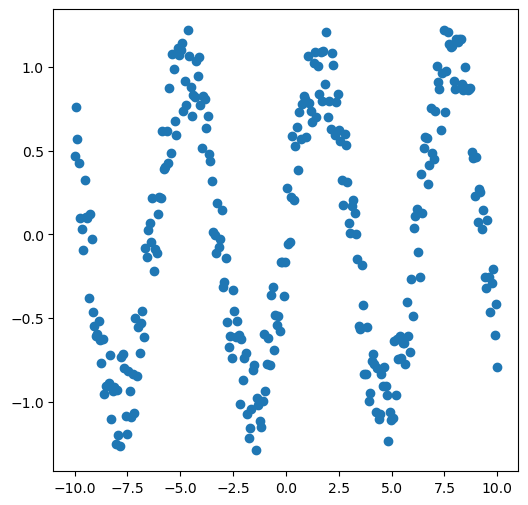

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)

In [18]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

## How well did our model fit the training data?

In [19]:
preds = model.predict(x)

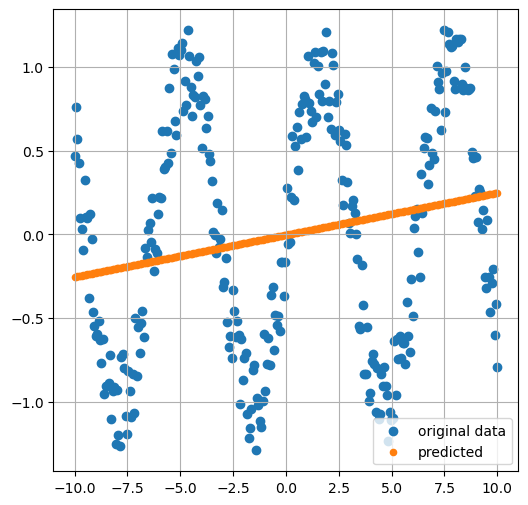

In [20]:
plt.figure(figsize=(6,6));
plt.scatter(x,y,label='original data');
# plot for the preds but reduze the size of the dots on the scatter
plt.scatter(x,preds,label='predicted',s=20);
plt.grid()
plt.legend();

As expected not well... you can see where this is going

In [21]:
new_x = np.sin(x) # change of basis

Relationship between `new_x` and `y` now

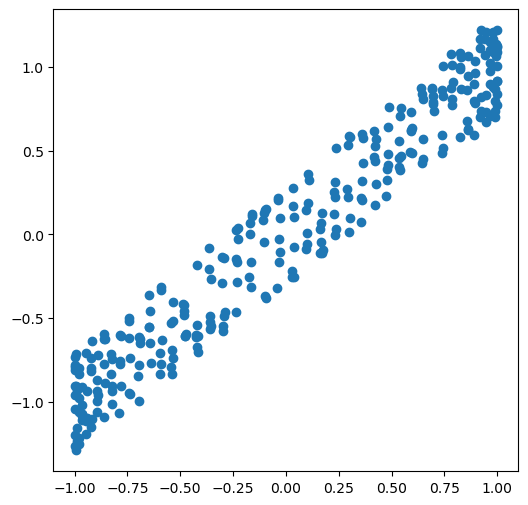

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(new_x,data['y'])

linear relationship yay!

In [23]:
new_model = LinearRegression()
new_model.fit(new_x,y)

LinearRegression()

In [24]:
new_preds = new_model.predict(new_x)
mse(y, new_preds)

0.030990612075248447

very low MSE... Awesome!

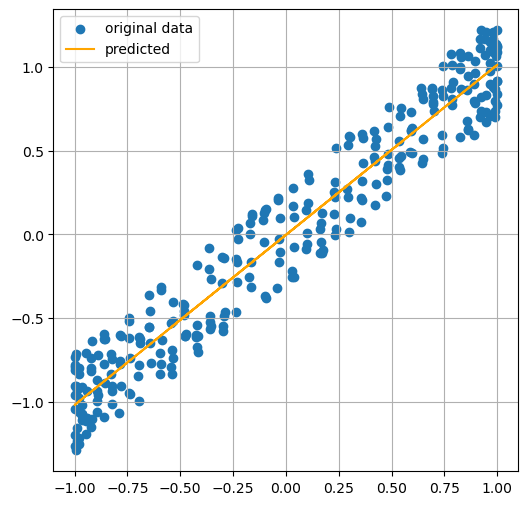

In [25]:
plt.figure(figsize=(6,6));
plt.scatter(new_x,y,label='original data');
# plot for the preds but reduze the size of the dots on the scatter
plt.plot(new_x,new_preds,label='predicted', color='orange');
plt.grid()
plt.legend();

Projecting back to original plane

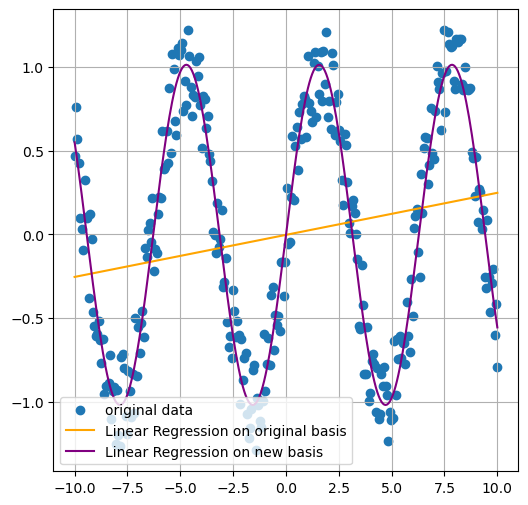

In [26]:
plt.figure(figsize=(6,6));
plt.scatter(x,y, label= 'original data')
plt.plot(x,preds,label='Linear Regression on original basis', color='orange');
plt.plot(x,new_preds,label='Linear Regression on new basis', color = 'purple');
plt.grid()
plt.legend();

# Example 3: Adding new feature dimensions

Here we demonstrate another useful trick on basis regression: increasing the original feature space with non-linear transformations

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%209%20-%20Deep%20Learning/data/noisy_circular.csv')
data

,x1,x2,target
0,1.044612,7.925011e-02,0
1,0.982989,1.904908e-01,0
2,1.034252,9.772543e-02,0
3,0.949778,1.222620e-01,0
4,0.794407,2.834135e-01,0
...,...,...,...
195,1.161538,-3.013776e-01,1
196,1.178314,-2.271015e-01,1
197,1.190346,-1.519109e-01,1
198,1.197584,-7.610870e-02,1


In [28]:
mask_class_1 = data['target'] == 0

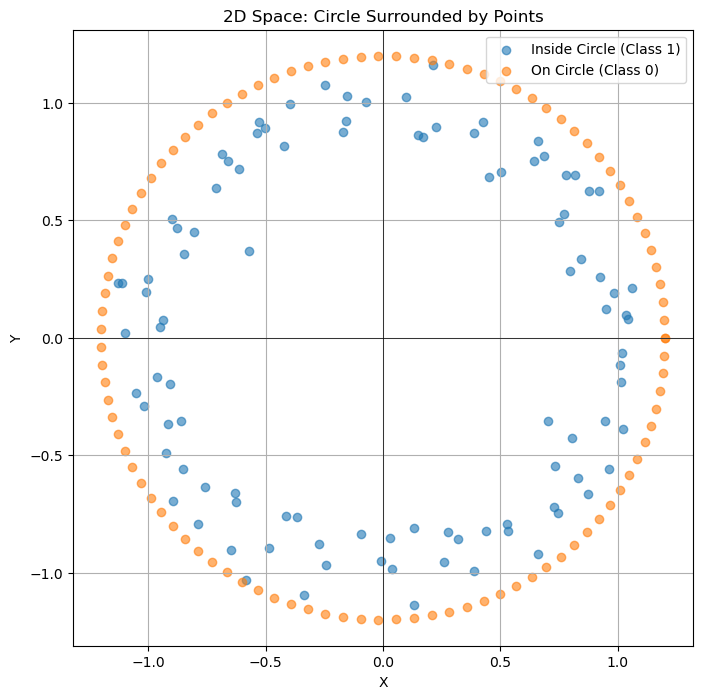

In [29]:
# Plotting the points
plt.figure(figsize=(8, 8))
plt.scatter(data.loc[mask_class_1,'x1'], data.loc[mask_class_1,'x2'], alpha=0.6, label='Inside Circle (Class 1)')
plt.scatter(data.loc[~mask_class_1,'x1'], data.loc[~mask_class_1,'x2'], alpha=0.6, label='On Circle (Class 0)')
plt.title('2D Space: Circle Surrounded by Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show();


Obviously there's no way we can separate these two classes with a linear plane, in fact let's try to do that

## Let's fit a Logistic Regression

In [30]:
X = data[['x1','x2']]
y = data['target']

In [31]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

## How well did our model fit the training data?

In [32]:
# Coefficients and intercept
w = clf.coef_[0]
b = clf.intercept_[0]

# Define the decision boundary
x_values = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
y_values = -(w[0] / w[1]) * x_values - (b / w[1])

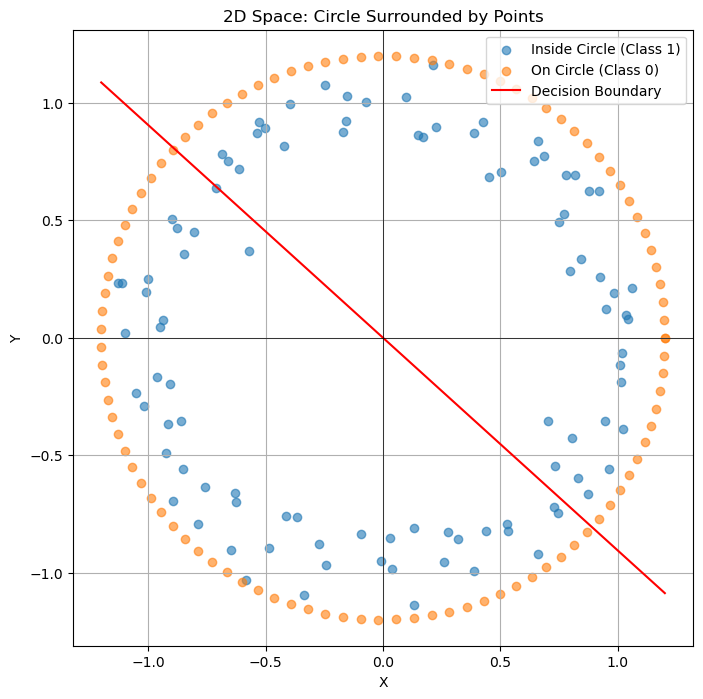

In [33]:
# plot the original data and the plane of the fitted logistic regression
plt.figure(figsize=(8, 8))
plt.scatter(data.loc[mask_class_1,'x1'], data.loc[mask_class_1,'x2'], alpha=0.6, label='Inside Circle (Class 1)')
plt.scatter(data.loc[~mask_class_1,'x1'], data.loc[~mask_class_1,'x2'], alpha=0.6, label='On Circle (Class 0)')
# Add the decision boundary to the plot
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.title('2D Space: Circle Surrounded by Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.axis('equal')
plt.legend();


In [34]:
f1_score(y, clf.predict(X))

0.5

Clearly this didn't go very well... but we were expecting that

## Change of basis

We will create another dimension on the feature space: $z = x^2 + y^2$. z is the square distance between each point and the $(0,0)$ coordinate. For points in the inner circle (class 1), they will have always values less than $r^2$. The points exactly on the circle (class 0) will all have the value exactly equal to $r^2$ 

In [35]:
x3 = X['x1']**2 + X['x2']**2
X_new = pd.concat([X,pd.Series(x3,index=X.index).rename('x3')],axis=1)
X_new

,x1,x2,x3
0,1.044612,7.925011e-02,1.097494
1,0.982989,1.904908e-01,1.002555
2,1.034252,9.772543e-02,1.079226
3,0.949778,1.222620e-01,0.917026
4,0.794407,2.834135e-01,0.711406
...,...,...,...
195,1.161538,-3.013776e-01,1.440000
196,1.178314,-2.271015e-01,1.440000
197,1.190346,-1.519109e-01,1.440000
198,1.197584,-7.610870e-02,1.440000


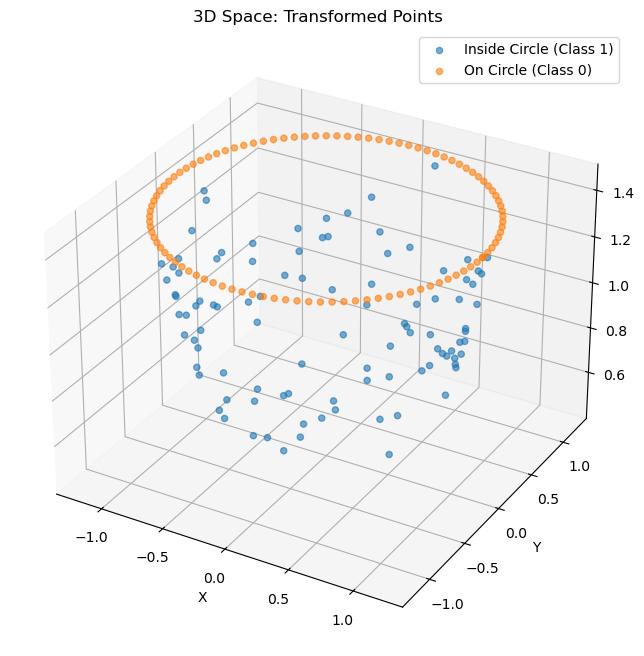

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the transformed points
ax.scatter(X_new.loc[mask_class_1,'x1'], X_new.loc[mask_class_1,'x2'], X_new.loc[mask_class_1,'x3'], alpha=0.6, label='Inside Circle (Class 1)')
ax.scatter(X_new.loc[~mask_class_1,'x1'], X_new.loc[~mask_class_1,'x2'], X_new.loc[~mask_class_1,'x3'], alpha=0.6, label='On Circle (Class 0)')

# Adding labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Space: Transformed Points')

# Adding grid and legend
ax.grid(True)
ax.legend()

# Show plot
plt.show();


All points are separable now

## Fitting a Logistic Regression on the new space

In [37]:
clf_new = LogisticRegression()
clf_new.fit(X_new,y)

LogisticRegression()

performance of our model

In [38]:
f1_score(y, clf_new.predict(X_new))

0.9569377990430622

Much better!

## Projecting the decision boundary to the original space

/Users/simaonovais/miniconda3/envs/MLCatolica24/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


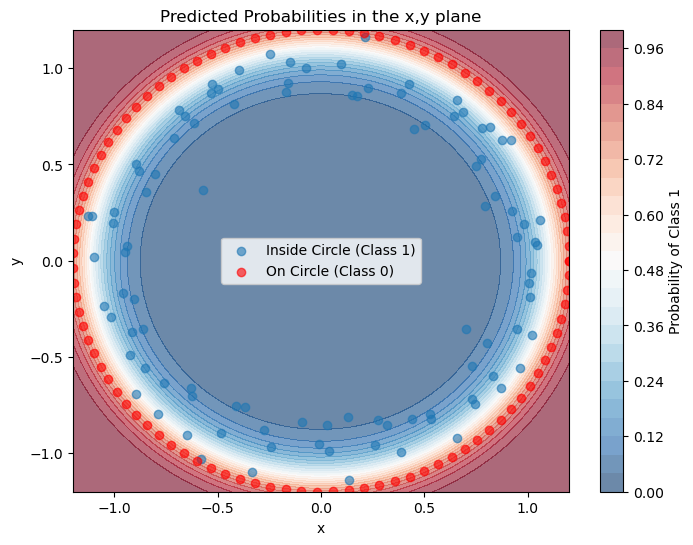

In [39]:
# Generate a meshgrid of (x, y) values
x_range = np.linspace(-1.2, 1.2, 100)
y_range = np.linspace(-1.2, 1.2, 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Transform to 3D using z = x^2 + y^2
z_mesh = x_mesh**2 + y_mesh**2

# Stack arrays in sequence horizontally (column wise) to create (x, y, z) tuples
grid = np.c_[x_mesh.ravel(), y_mesh.ravel(), z_mesh.ravel()]

# Predict probabilities using the logistic regression model
probs = clf_new.predict_proba(grid)[:, 1]
probs = probs.reshape(x_mesh.shape)

# Plot the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_mesh, y_mesh, probs, levels=25, cmap="RdBu_r", alpha=0.6)
plt.colorbar(contour, label="Probability of Class 1")

plt.scatter(data.loc[mask_class_1,'x1'], data.loc[mask_class_1,'x2'], alpha=0.6, label='Inside Circle (Class 1)')
plt.scatter(data.loc[~mask_class_1,'x1'], data.loc[~mask_class_1,'x2'], alpha=0.6, label='On Circle (Class 0)',color='red')

plt.title("Predicted Probabilities in the x,y plane")
plt.xlabel('x')
plt.ylabel('y')
plt.legend();


As you can see, a logistic Regression, which at most does a linear hyperplane to separate the data, is a circle here that nearly-perfectly classifies this dataset thanks to the new dimension added.

# Seeing this in practice with a Multi-Layer Perceptron

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

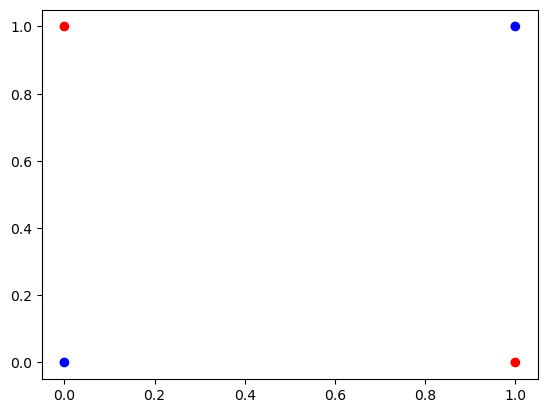

In [41]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# plot this
plt.scatter(X.numpy()[:,0], X.numpy()[:,1],c=y.numpy(), cmap='bwr')


In [42]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

In [43]:
n_epochs = 2000

model = SimpleMLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

losses = []

for epoch in range(n_epochs):
    output = model(X)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

[training animation here](https://github.com/samsung-ai-course/6-7-edition/blob/main/Intro%20to%20Deep%20Learning/training_process.gif)